<a href="https://colab.research.google.com/github/bzotec/ai-text-classification/blob/main/email_sms_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#End-to-End Project on SMS/Email Spam Detection using Naive Bayes

#import Libraries
import pandas as pd
import numpy as np

#spam training data from kaggle
"""
set of SMS-tagged messages in English that have been classified
as being ham (‘legitimate’) and spam. Each line holds one message.
Two columns make up each line:v1 carries the label such as (spam or ham)
and v2 contains the actual content.
"""
#our DataFrame
df = pd.read_csv('spam.csv',encoding='latin-1')


In [13]:
#Data Cleaning
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace= True)
df.rename(columns={'v1':'message_type', 'v2':'message'},inplace=True)
"""
As this is a classification problem we want the “message_type”
to be binary classified i.e, 0 or 1 so for this purpose we use label encoder.
"""
from sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()

df['message_type']=encoder.fit_transform(df['message_type'])

#check for the missing values
df.isnull().sum()
df.duplicated().sum()

#There are 403 duplicated values and we have to remove them
df= df.drop_duplicates()

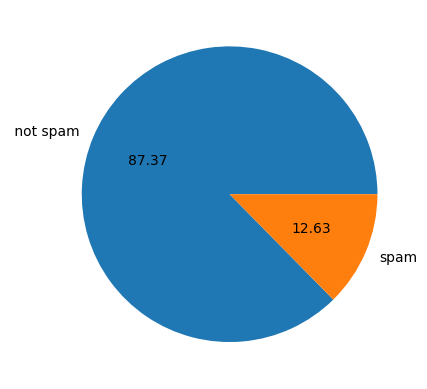

In [15]:
#Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt

df['message_type'].value_counts()

#visualise the classification problem to get a better understanding of the data
plt.pie(df['message_type'].value_counts(),labels=[' not spam','spam'],autopct='%0.2f')
plt.show()

In [16]:
#For a number of characters :
import nltk
nltk.download('punkt')
df['num_characters']=df['message'].apply(len)
#df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
#For a number of words :

from nltk.tokenize import word_tokenize
df['message'].apply(lambda x: nltk.word_tokenize(x))

df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))
#df.sample(5)

,message_type,message,num_characters,num_words
4737,0,I bought the test yesterday. Its something tha...,237,55
159,1,You are a winner U have been specially selecte...,146,30
5333,0,Neither [in sterm voice] - i'm studying. All f...,125,32
1068,1,Someone U know has asked our dating service 2 ...,134,28
4133,0,Is it your yahoo boys that bring in the perf? ...,55,14


In [21]:
#For a number of sentences :

df['num_sentences']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
1226,1,Reply with your name and address and YOU WILL ...,159,23,1
3863,0,A pure hearted person can have a wonderful smi...,198,43,2
2034,0,Is avatar supposed to have subtoitles,37,6,1
253,0,"Ups which is 3days also, and the shipping comp...",179,40,2
3323,0,I don wake since. I checked that stuff and saw...,126,29,3


In [23]:
#For ‘Ham’ messages:
df[df['message_type']==0][['num_characters','num_words','num_sentences']].describe()
df.sample(5)

,message_type,message,num_characters,num_words,num_sentences
2358,0,I'll talk to the others and probably just come...,66,13,1
1339,0,Every monday..nxt week vl be completing..,41,9,1
4780,0,Yup... Hey then one day on fri we can ask miwa...,80,18,1
871,0,Its going good...no problem..but still need li...,102,18,1
905,0,Hey what's up charles sorry about the late reply.,49,11,1


In [24]:
#For ‘Spam’ messages:

df[df['message_type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

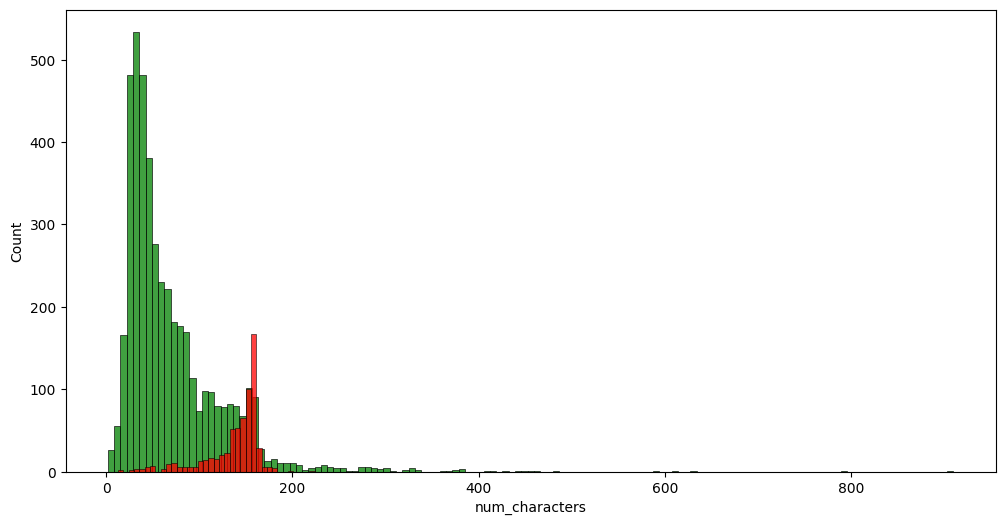

In [25]:
#for characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_characters'],color='green')
sns.histplot(df[df['message_type']==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

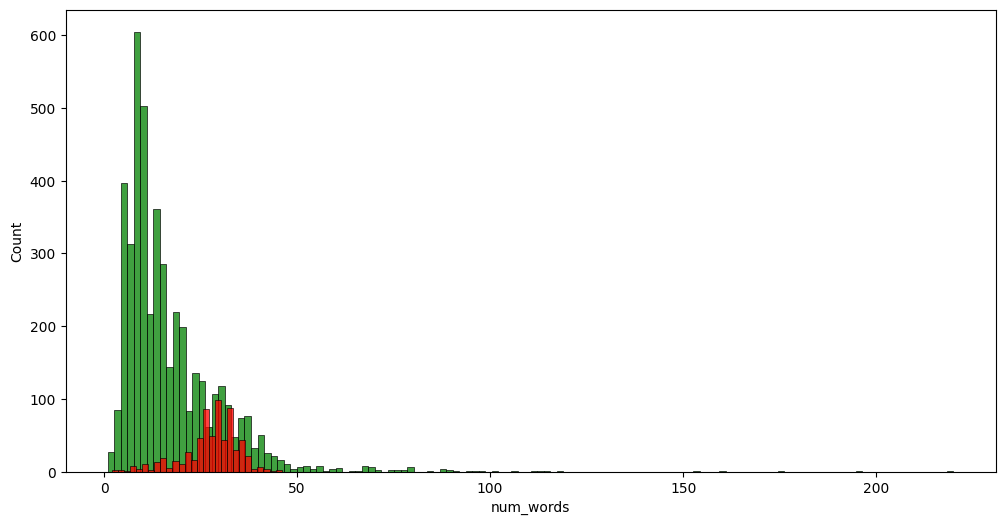

In [26]:
#for words
plt.figure(figsize=(12,6))
sns.histplot(df[df['message_type']==0]['num_words'],color='green')
sns.histplot(df[df['message_type']==1]['num_words'],color='red')

<ipython-input-27-e915062b8451>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

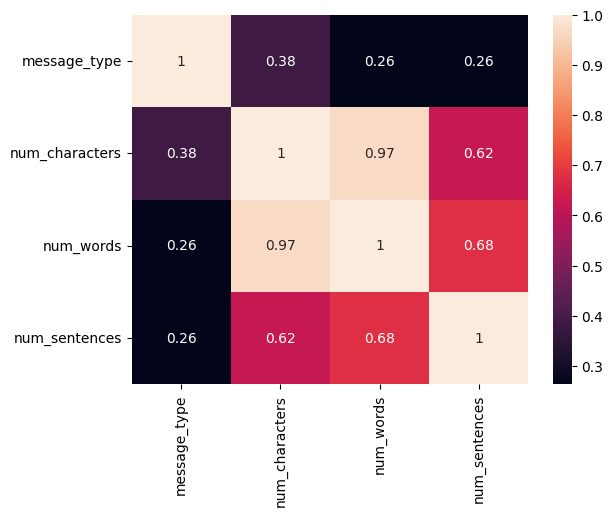

In [27]:
#plotting a heatmap for the correlation
sns.heatmap(df.corr(),annot=True)

In [31]:
"""
As we see multicollinearity here, we cannot use all three columns
instead we shall use only one and that should be num_characters
that has highest correlation with message_type.
"""

def text_transform(message):
    message=message.lower() #change to lowercase
    message=nltk.word_tokenize(message)

    y=[]
    for i in message:
        if i.isalnum():
            y.append(i)

        y.clear()


    #for checking punctuations and stopwords
    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    message=y[:]
    y.clear()

    #now stemming function
    for i in message:
        y.append(ps.stem(i))

    #return y  --> returns as list
    return " ".join(y)

# Removing stop words and punctuations
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
len(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


179

In [30]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
# stemming
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

#Now let’s apply the text_transform function to all the messages in the dataset.
df['transformed_msg']=df['message'].apply(text_transform)

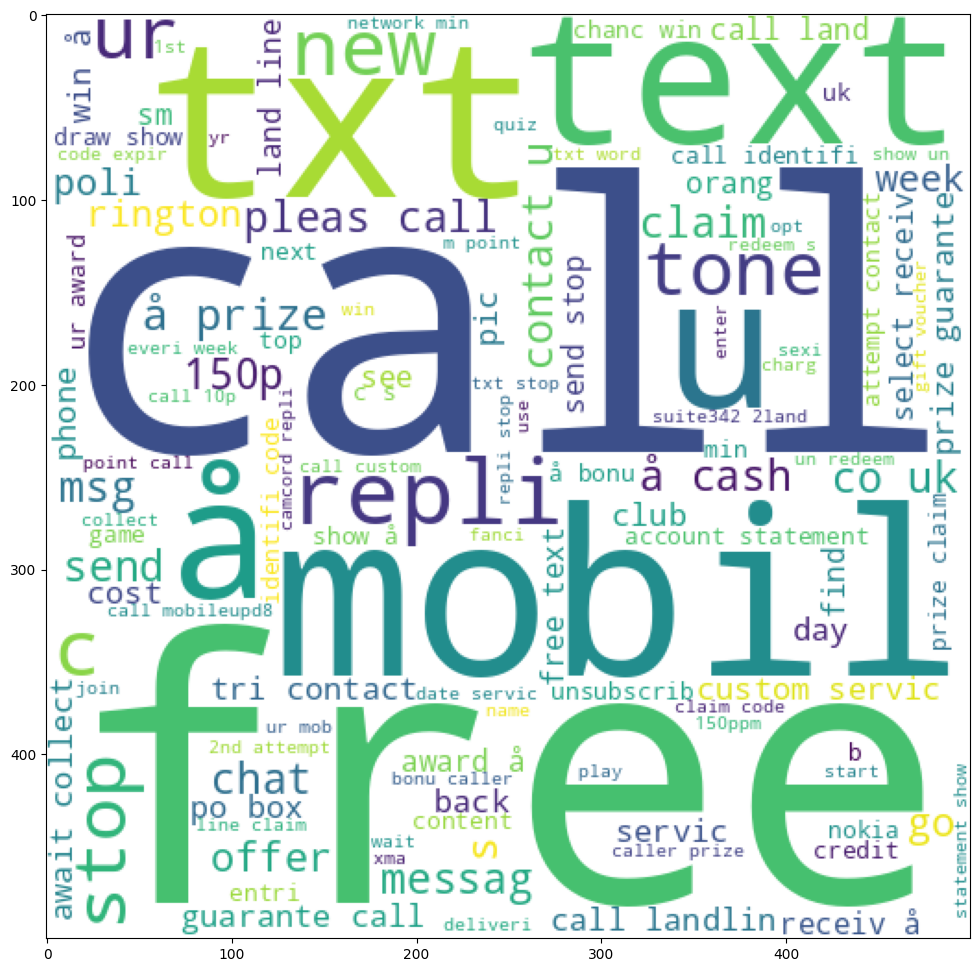

In [35]:
#To get a clear idea about the most frequent words used we make a  word cloud.
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

#For Spam:

spam_wc=wc.generate(df[df['message_type']==1]['transformed_msg'].str.cat(sep=""))

plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

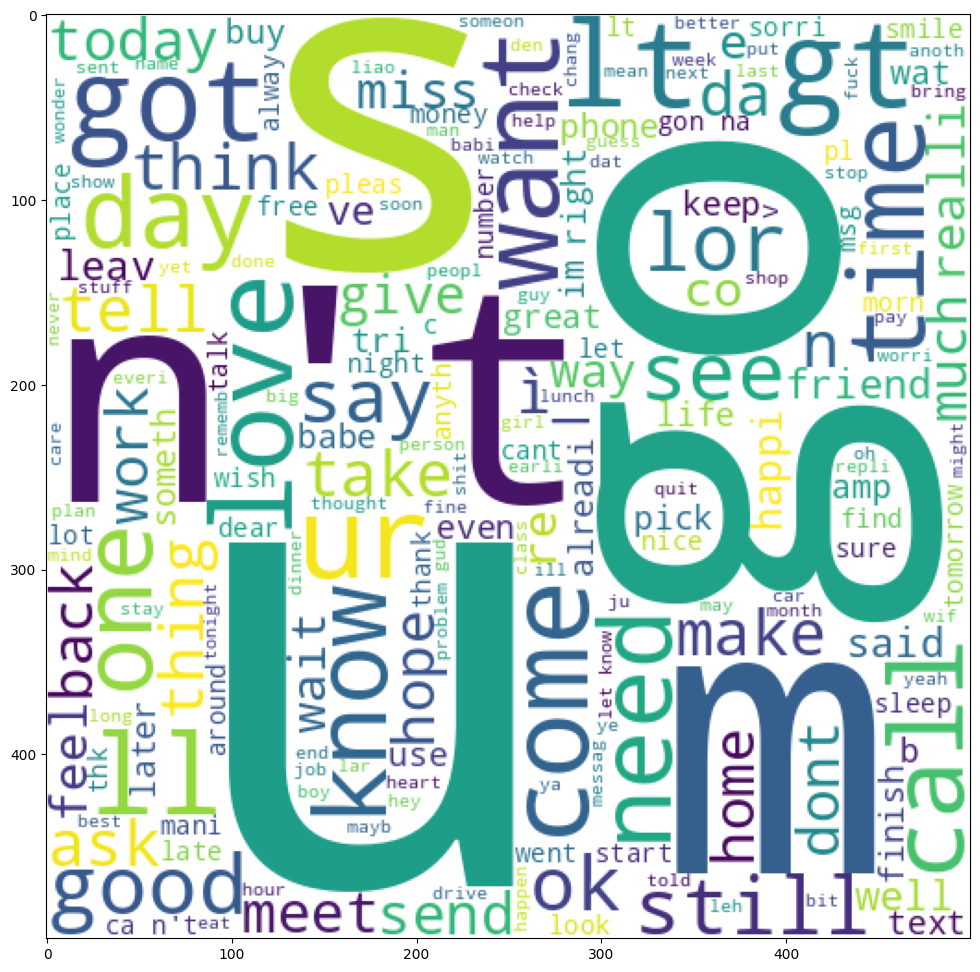

In [36]:
#For Ham:

ham_wc=wc.generate(df[df['message_type']==0]['transformed_msg'].str.cat(sep=""))

plt.figure(figsize=(18,12))

plt.imshow(ham_wc)

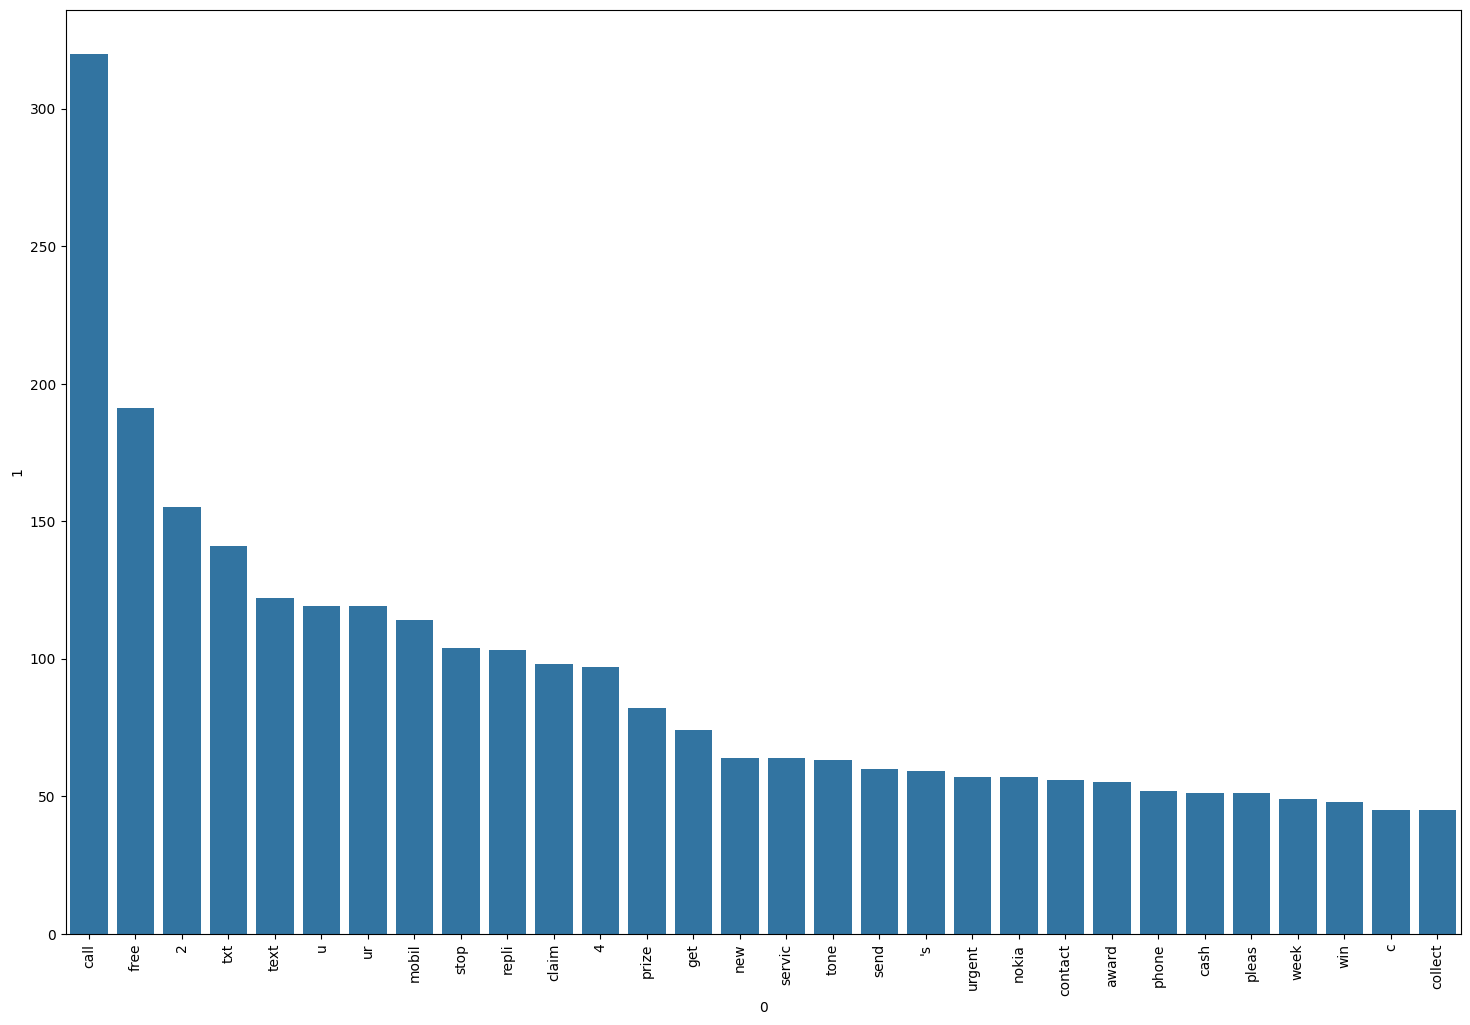

In [40]:
"""
To simplify what is drawn inside the WordClouds
we will find out the top 30 words used in both ham as well as spam messages.
"""

spam_corpus=[]
for msg in df[df['message_type']==1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
from collections import Counter
Counter(spam_corpus)
Counter(spam_corpus).most_common(30)
plt.figure(figsize=(18,12))
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
#Building a Model using Naive Bayes
"""
Input is categorical Output is Numerical.
But as we know in the Naive Bayes algorithm the input columns
should be numerical so we have to convert (VECTORIZE) the column.
"""
#TFIDF vectorization gives the best accuracy and precision score
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_msg']).toarray()
y=df['message_type'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

#Now find out the Accuracy score, confusion Matrix and Precision Score of all 3 types of Naive Bayes:
gnb.fit(X_train,y_train)
y_pred1= gnb.predict(X_test)
print('Accuracy score of Gaussian NB is: ',accuracy_score(y_test,y_pred1))
print('Confusion Matrix of Guassian NB is: ',confusion_matrix(y_test,y_pred1))
print('Precision score of the Gaussian NB is',precision_score(y_test,y_pred1))

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('Accuracy score of Multinomial NB is: ',accuracy_score(y_test,y_pred2))
print('Confusion Matrix of Multinomial NB is: ',confusion_matrix(y_test,y_pred2))
print('Precision score of the Multinomial NB is',precision_score(y_test,y_pred2))

"""
Here the precision comes out to be 1 which proves very good for our model
 as there will be no “FALSE POSITIVES”
"""

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('Accuracy score of Bernoulli NB is: ',accuracy_score(y_test,y_pred3))
print('Confusion Matrix of Bernoulli NB is: ',confusion_matrix(y_test,y_pred3))
print('Precision score of the Bernoulli NB is',precision_score(y_test,y_pred3))

#Hence we finalise the Model with MNB(Multinomial Naive Bayes) and TFIDF Vectorization.


Accuracy score of Gaussian NB is:  0.8781431334622823
Confusion Matrix of Guassian NB is:  [[790 106]
 [ 20 118]]
Precision score of the Gaussian NB is 0.5267857142857143
Accuracy score of Multinomial NB is:  0.9748549323017408
Confusion Matrix of Multinomial NB is:  [[896   0]
 [ 26 112]]
Precision score of the Multinomial NB is 1.0
Accuracy score of Bernoulli NB is:  0.988394584139265
Confusion Matrix of Bernoulli NB is:  [[896   0]
 [ 12 126]]
Precision score of the Bernoulli NB is 1.0


In [53]:
# Change the max_feature parameter in TFIDF.

temp_df = pd.DataFrame({'Algorithm': ['GaussianNB','MultinomialNB','BernoulliNB'],
                       'Accuracy_max_ft_3000': [0.975155,0.979866,0.973062],
                       'Precision_max_ft_3000': [1.0,1.0,1.0]}).sort_values('Precision_max_ft_3000',ascending=False)

temp_df = pd.DataFrame({'Algorithm': ['GaussianNB','MultinomialNB','BernoulliNB'],
                       'Accuracy_scaling': [0.975155,0.979866,0.973062],
                       'Precision_scaling': [1.0,1.0,1.0]}).sort_values('Precision_scaling',ascending=False)

new_df = temp_df.merge(temp_df,on='Algorithm')

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

temp_df = pd.DataFrame({'Algorithm': ['GaussianNB','MultinomialNB','BernoulliNB'],
                       'Accuracy_num_chars': [0.975155,0.979866,0.973062],
                       'Precision_num_chars': [1.0,1.0,1.0]}).sort_values('Precision_num_chars',ascending=False)

new_df_scaled.merge(temp_df,on='Algorithm')

#After a lot of experiments and improvement,
#we have trained our model to get an Accuracy score of 97% and a precision Score of 100%.

,Algorithm,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,GaussianNB,0.975155,1.0,0.975155,1.0,0.975155,1.0,0.975155,1.0
1,MultinomialNB,0.979866,1.0,0.979866,1.0,0.979866,1.0,0.979866,1.0
2,BernoulliNB,0.973062,1.0,0.973062,1.0,0.973062,1.0,0.973062,1.0
